## Regression Neural Network for Students Scores predictions
| Tec. Univ. en Inteligencia Artificial
| Machine Learning II  

Team members:  
- López Ceratto, Julieta.  
- Rodríguez Griñó, Tomás.  
- Slepoy, David.  

## Description // Descripción
**EN**  
In this problem, a dataset is presented that contains information about the academic performance of university students, as well as various factors that may influence it. The objective is to build a regression model using neural networks to predict the students' academic performance index based on the provided features.

**ESP**  
En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.

## Dataset

https://drive.google.com/file/d/1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc/view?usp=drive_link

**EN**  
The provided dataset includes the following variables for each student:
- **Hours Studied:** The total number of hours each student dedicated to studying.
- **Previous Scores:** The scores obtained by the students in previous exams.
- **Extracurricular Activities:** Whether the student participates in extracurricular activities (Yes or No).
- **Sleep Hours:** The average number of hours the student sleeps per day.
- **Sample Question Papers Practiced:** The number of sample question papers the student practiced with.

Additionally, the dataset includes the target variable:
- **Performance Index:** An index that represents the overall academic performance of each student, rounded to the nearest integer. This index ranges from 10 to 100, where higher values indicate better performance.

**ESP**  
El dataset proporcionado incluye las siguientes **variables** para cada estudiante:
- **Hours Studied**: El número total de horas dedicadas al estudio por cada estudiante.
- **Previous Scores**: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
- **Extracurricular Activities:** Si el estudiante participa en actividades extracurriculares (Sí o No).
- **Sleep Hours:** El número promedio de horas de sueño que el estudiante tuvo por día.
- **Sample Question Papers Practiced:** El número de cuestionarios de muestra que el estudiante practicó.  

Además, el dataset incluye la **variable objetivo**:
- **Performance Index:** Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.


## Objective // Objetivo 
**EN**  
Using the provided dataset, the goal is to build a regression model using neural networks that can accurately predict the academic performance index of the students. The model should be trained and evaluated using appropriate validation techniques and regression evaluation metrics.

**ESP**  
Utilizando el dataset proporcionado, el objetivo es construir un modelo de regresión utilizando redes neuronales que pueda predecir con precisión el índice de rendimiento académico de los estudiantes. Se debe entrenar y evaluar el modelo utilizando técnicas adecuadas de validación y métricas de evaluación de regresión.


## 0.Librerías a utilizar y split dataset

In [1]:
%pip install pandas
%pip install numpy
%pip install gdown
%pip install zipfile
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\julil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\julil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\julil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\julil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for zipfile


  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-proto 1.28.2 requires protobuf<6.0,>=5.0, but you have protobuf 4.25.6 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\julil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [135]:
import pandas as pd
import numpy as np
import gdown
import zipfile
import tensorflow as tf
from keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Carga y split dataset

In [7]:
url_zip_file = 'https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc&export=download'

#descarga de zip
df = gdown.download(url_zip_file, './data/students_performance.zip')

#extraccion de zip en variable df
with open(df , 'rb') as f:
    with zipfile.ZipFile(f) as z:
        # 3. Mostrar nombres de los archivos dentro del ZIP
        print(z.namelist())  # útil si no sabés el nombre exacto

        # 4. Leer el archivo CSV directamente en memoria
        with z.open(z.namelist()[0]) as csvfile:
            df = pd.read_csv(csvfile)

Downloading...
From: https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc&export=download
To: c:\Users\julil\OneDrive\Desktop\TecIA\3_anio\Aprendizaje Automatico II\NN_Students_Scores\data\students_performance.zip
100%|██████████| 49.7k/49.7k [00:00<00:00, 1.32MB/s]

['Student_Performance.csv']


In [8]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [15]:
X = df.drop('Performance Index', axis = 1)
y = df['Performance Index']
print(f"Columnas X: {list(X.columns)}")
print(f"Target: {y.name}")

Columnas X: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
Target: Performance Index


In [17]:
# Dividir en conjunto de entrenamiento y conjunto de prueba+validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividir X_val en conjunto de validación y prueba (50% de 30% para cada uno)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

print(f"filas X_train: {len(X_train)}")
print(f"filas X_val: {len(X_val)}")
print(f"filas X_test: {len(X_test)}")

filas X_train: 7000
filas X_val: 1500
filas X_test: 1500


#### Funciones de ploteo a utilizar

In [156]:
def plot_distribution(df, column):
    plt.figure(figsize=(15,10))
    
    if df[column].dtype == 'int64':
        # Histograma + KDE
        plt.subplot(2,2,1)
        sns.histplot(data=df, x=column, kde=True, bins='auto')
        plt.title(f'Histograma + KDE de {column}')
        
        # Boxplot + Violin
        plt.subplot(2,2,2)
        sns.boxplot(data=df, y=column)
        plt.title(f'Boxplot de {column}')

    else:
        plt.subplot(2,2,1)
        sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f'Distribución de {column}')


        
    
    plt.tight_layout()
    plt.show()

## 1. Análisis previo y preprocesamiento del set de datos.

### Análisis

Realizamos el análisis solo sobre el conjunto de train ya que se simula una situación real.

In [149]:
X_train.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,7000.000000,7000.000000,7000.000000,7000.000000
mean,4.984571,69.602571,6.542000,4.619714
std,2.596511,17.340411,1.696826,2.867849
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,55.000000,5.000000,2.000000
50%,5.000000,69.500000,7.000000,5.000000
75%,7.000000,85.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


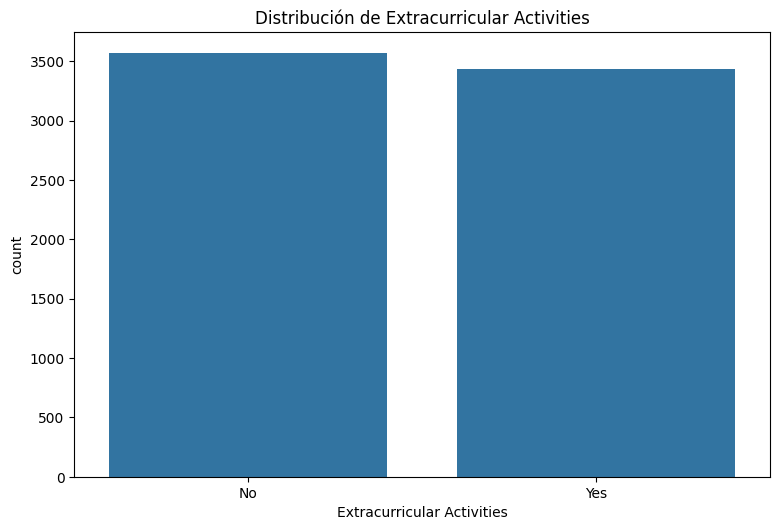

In [157]:
plot_distribution(X_train, 'Extracurricular Activities')

#### Distribuciones por feature

Obtenemos las distribuciones para cada columna

## 2. Definición y entrenamiento del modelo.

## 3. Resultados de la evaluación del modelo. 
Incluyendo métricas de desempeño y visualizaciones relevantes.